# Regional trend : depth-time cross section
- Include AOU and solubility to the analysis
- X-axis = time
- Y-axis = depth
- Color = O2 (Sol/AOU) averaged over an area

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import gsw
from scipy import stats
from multiprocessing import pool
import cartopy.crs as ccrs

In [10]:
gver='1.2.G.1.1.1'
# Box A
xrange=[-30,-20]
yrange=[10,14]
O2crit=90

In [3]:
diro2='/glade/campaign/univ/ugit0034/ML4O2_results/'
dirTS='/glade/campaign/univ/ugit0034/EN4/L09_20x180x360/'

In [4]:
dm=xr.open_dataset('basin_mask_01.nc')
mask=dm.basin_mask.to_numpy()

In [5]:
ds=xr.open_dataset(diro2+f'O2map_v{gver}.nc')

In [6]:
Zref=1000
z = ds.depth.sel(depth=slice(0,Zref)).to_numpy()
#
time = ds.time
time1= np.arange(1965,2021,1/12)
print(time.shape,time1.shape)

(672,) (672,)


In [7]:
xx,yy=np.meshgrid(ds.lon,ds.lat)
ind = (xx>=xrange[0])&(xx<xrange[1])&(yy>=yrange[0])&(yy<yrange[1])
wxy = np.where(ind==True,1,0)
weight=xr.DataArray(data=wxy,dims=['lat','lon'],coords={'lat':ds.lat,'lon':ds.lon})

In [8]:
o2w = ds.o2.sel(depth=slice(0,Zref)).weighted(weight).mean(('lon','lat'))
aouw = ds.aou.sel(depth=slice(0,Zref)).weighted(weight).mean(('lon','lat'))
solw = o2w + aouw

## display the result

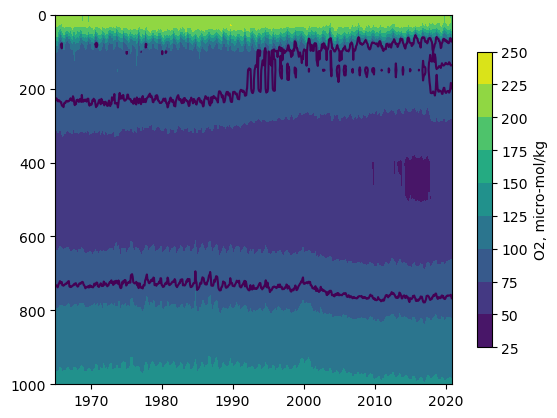

In [11]:
im=plt.contourf(time1,z,o2w.T)
plt.contour(time1,z,o2w.T,[O2crit])
plt.ylim(Zref,0)
plt.colorbar(im,shrink=0.8,label='O2, micro-mol/kg')